Stochastic Modelling and Simulation project:
Multi-Robot Target Search using Probabilistic Consensus on Discrete Markov Chains.

In [1]:
import numpy as np
from Utils.Agent import Agent
from Utils.DTMC_Utils import DTMC_Utils
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
np.random.seed(12345)


Experimental parameter:

In [3]:
N = 3 # number of agents

alpha = 0.33 # to be chosen in (0, 1/d_max) <- d_max = N-1

map_width = 5 # (meters)
map_height = 5

S = map_width * map_height # number of nodes (locations)


Graph initialization:

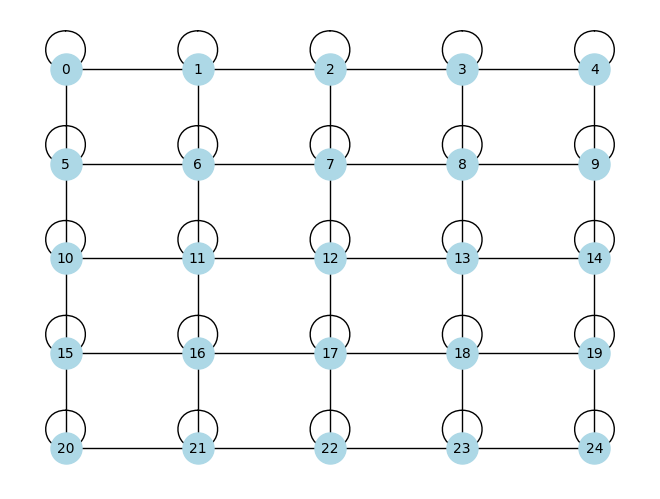

In [4]:
grid_graph = GridGraph(map_width, map_height)
grid_graph.plot_graph() 

In [5]:
def getRandomTarget(num_of_nodes, num_of_node_target_visible=3):
    """This method generates a list of consecutive nodes starting from a random node, ensuring the sequence stays within the total node range."""
    
    start_node = np.random.randint(0, num_of_nodes - num_of_node_target_visible + 1)
    target_nodes = [start_node + i for i in range(num_of_node_target_visible)]
    
    return target_nodes

Target init:

In [6]:
reference_information_state = 1
# Z_r = [4, 5, 6] 
Z_r = getRandomTarget(S)
print("The reference information state is: " + str(reference_information_state))
print("Target is observable from nodes: " + str(Z_r))

The reference information state is: 1
Target is observable from nodes: [2, 3, 4]


Agents init:

In [7]:
agents = DTMC_Utils.initAgents(N,S)
for ag in agents:
    print(ag)

Agent ID: 1, 
Position: 5 
Information state: 0.3163755545817859

Agent ID: 2, 
Position: 4 
Information state: 0.03975949588835437

Agent ID: 3, 
Position: 5 
Information state: 0.5320779204036645


Graph class representing agent's environment

Finished. Information State Vector: [[1.]
 [1.]
 [1.]
 [1.]]


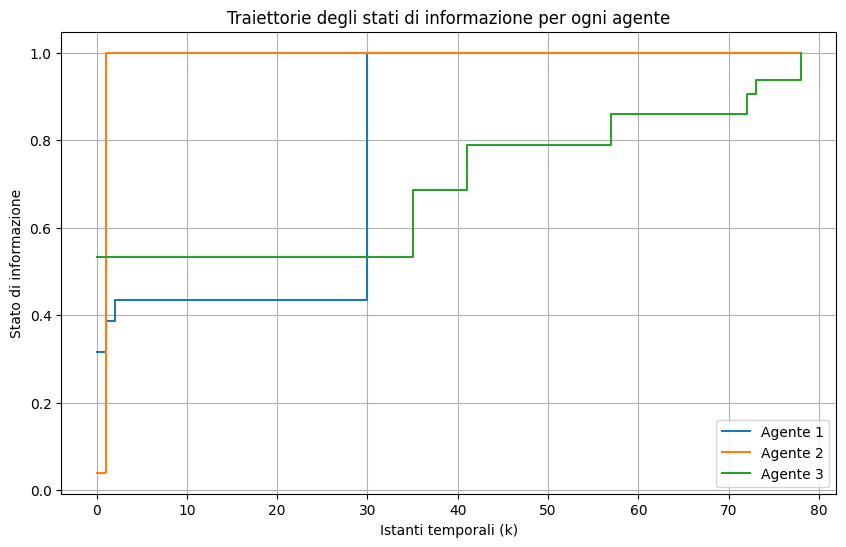

In [8]:
experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
experiment.run()
print(f"Finished. Information State Vector: {experiment.getInformationStateVector()}")        
experiment.plot_agents_information_state_trajectories()
#print(f"{experiment.getIterationNumber()} iterazioni in {experiment.getExecutionTime()} secondi")

In [9]:
# def plot_average_execution_time(agents_number_list, average_execution_time_list):
#     plt.figure(figsize=(8, 6))
#     plt.plot(agents_number_list, average_execution_time_list, marker='o', linestyle='-', color='b', label='Average Execution Time')
#     plt.xlabel("Number of Agents")
#     plt.ylabel("Average Execution Time (s)")
#     plt.title("Average Execution Time vs Number of Agents")
#     plt.legend()
#     plt.grid(True)
#     plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
#     plt.show()

def plot_average_execution_time(agents_number_list, average_execution_time_list, std_deviation_list, x_label):
    plt.figure(figsize=(8, 6))
    
    plt.errorbar(
        agents_number_list, average_execution_time_list, yerr=std_deviation_list,
        fmt='o-', color='b', ecolor='gray', elinewidth=2, capsize=4, label='Average Execution Time'
    )
    
    plt.xlabel(x_label)
    plt.ylabel("Average Execution Time (iterations)")
    plt.title("Average Execution Time vs Number of Agents")
    plt.legend()
    plt.grid(True)
    
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plt.show()


Average time until consensus vs number of agents 

In [10]:
# num_of_experiments = 100
# N = [3,4,5,6,7,8]
# 
# average_consensus_time = []
# average_standard_deviation = []
# 
# for agent_number in N:
#     print(f"Experiment with {agent_number} agents:")
#     nodesNumber = grid_graph.getNodesNumber()
#     consensus_times = []
#     alpha = 1 / (agent_number - 1)
#     
#     for j in range(num_of_experiments): 
#         print(f"Iteration {j}:")
#         agents = initAgents(agent_number, nodesNumber)
#         experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
#         experiment.run()
#         consensus_times.append(experiment.getMeanConsensusTime())
#     
#     average_consensus_time.append(np.mean(consensus_times))
#     average_standard_deviation.append(np.std(consensus_times))
# 
# plot_average_execution_time(N, average_consensus_time, average_standard_deviation, "Number of Agents")
# # plot_average_execution_time(N, average_execution_time)
# # plot_average_execution_time(N, average_iterations)


Average time until consensus vs grid_dimension

In [11]:
# average_consensus_time = []
# average_standard_deviation = []
# grid_dimensions = [5,8,10,12,15,20]
# N = 5
# alpha = 1 / (N - 1)
# 
# for grid_dimension in grid_dimensions:
#     nodesNumber = grid_dimension * grid_dimension
#     consensus_times = []
#     grid_graph = GridGraph(grid_dimension, grid_dimension)
#     
#     for j in range(num_of_experiments): 
#         print(f"Iteration {j}:")
#         agents = initAgents(N, nodesNumber)
#         experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
#         experiment.run()
#         consensus_times.append(experiment.getMeanConsensusTime())
#     
#     average_consensus_time.append(np.mean(consensus_times))
#     average_standard_deviation.append(np.std(consensus_times))
# 
# plot_average_execution_time(grid_dimensions, average_consensus_time, average_standard_deviation, "Grid dimension")

In [12]:
num_of_experiments = 1
agent_numbers = [3, 5, 7, 9]
grid_dimensions = [5, 8, 10, 12, 15, 20]

X, Y = np.meshgrid(agent_numbers, grid_dimensions)
Z = np.zeros_like(X, dtype=float)         
Z_std = np.zeros_like(X, dtype=float)    

for i, agent_number in enumerate(agent_numbers):
    # print("Agent number:", agent_number)
    for j, grid_dimension in enumerate(grid_dimensions):
        print(f"Agent number: {agent_number}\n grid_dim: {grid_dimension}")
        nodesNumber = grid_dimension * grid_dimension
        grid_graph = GridGraph(grid_dimension, grid_dimension)
        consensus_times = []
        alpha = 1 / (agent_number - 1)
        
        for k in range(num_of_experiments): 
            agents = DTMC_Utils.initAgents(agent_number, nodesNumber)
            experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
            experiment.run()
            consensus_times.append(experiment.getMeanConsensusTime())
        
        Z[j, i] = np.mean(consensus_times) 
        Z_std[j, i] = np.std(consensus_times)


Agent number: 3
 grid_dim: 5
Agent number: 3
 grid_dim: 8
Agent number: 3
 grid_dim: 10
Agent number: 3
 grid_dim: 12
Agent number: 3
 grid_dim: 15
Agent number: 3
 grid_dim: 20
Agent number: 5
 grid_dim: 5
Agent number: 5
 grid_dim: 8
Agent number: 5
 grid_dim: 10
Agent number: 5
 grid_dim: 12
Agent number: 5
 grid_dim: 15
Agent number: 5
 grid_dim: 20
Agent number: 7
 grid_dim: 5
Agent number: 7
 grid_dim: 8
Agent number: 7
 grid_dim: 10
Agent number: 7
 grid_dim: 12
Agent number: 7
 grid_dim: 15
Agent number: 7
 grid_dim: 20
Agent number: 9
 grid_dim: 5
Agent number: 9
 grid_dim: 8
Agent number: 9
 grid_dim: 10
Agent number: 9
 grid_dim: 12
Agent number: 9
 grid_dim: 15
Agent number: 9
 grid_dim: 20


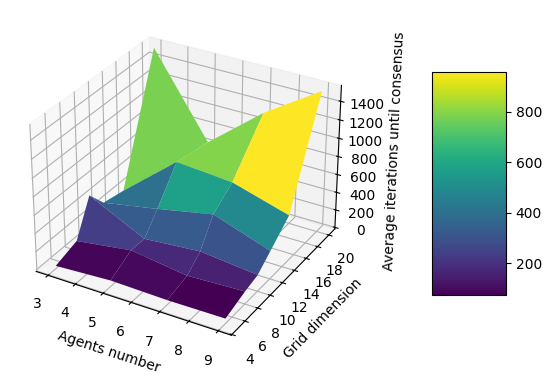

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

cbar = fig.colorbar(surf, ax=ax, pad=0.15, aspect=3)

ax.set_xlabel('Agents number')
ax.set_ylabel('Grid dimension')
ax.set_zlabel('Average iterations until consensus')

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

In [14]:
output_file = 'experiment_data_full.npz'

# Salva i dati come un file .npz, inclusi X e Y
np.savez(output_file, X=X, Y=Y, Z=Z, Z_std=Z_std, agent_numbers=agent_numbers, grid_dimensions=grid_dimensions)

print(f"Tutti i dati salvati correttamente in {output_file}")
# 
# data = np.load('experiment_data_full.npz')
# 
# # Recupera tutti gli array salvati
# X_loaded = data['X']
# Y_loaded = data['Y']
# Z_loaded = data['Z']
# Z_std_loaded = data['Z_std']
# agent_numbers_loaded = data['agent_numbers']
# grid_dimensions_loaded = data['grid_dimensions']
# 
# print(agent_numbers_loaded)
# print(Y_loaded)

Tutti i dati salvati correttamente in experiment_data_full.npz
[3 5 7 9]
[[ 5  5  5  5]
 [ 8  8  8  8]
 [10 10 10 10]
 [12 12 12 12]
 [15 15 15 15]
 [20 20 20 20]]


Alpha parameter analysis:

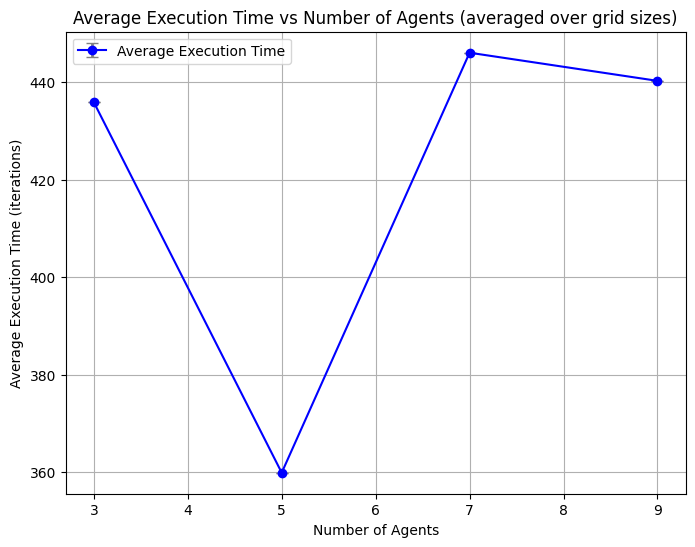

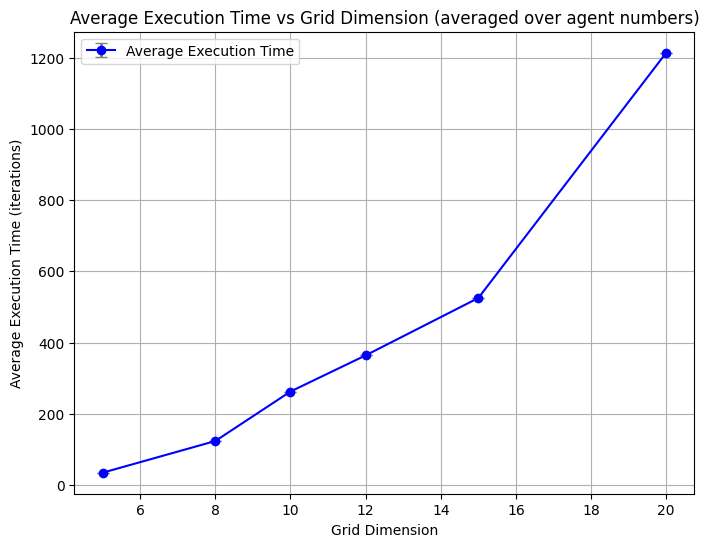

In [15]:
# Media i valori di Z e Z_std per ogni numero di agenti (fisso X e varia Y)
Z_mean_over_grids = np.mean(Z, axis=0)
Z_std_over_grids = np.mean(Z_std, axis=0)

# Media i valori di Z e Z_std per ogni dimensione di griglia (fisso Y e varia X)
Z_mean_over_agents = np.mean(Z, axis=1)
Z_std_over_agents = np.mean(Z_std, axis=1)

# Plot con X (numero di agenti) e Y mediato
DTMC_Utils.plot_average_execution_time(
    agent_numbers, Z_mean_over_grids, Z_std_over_grids, 
    "Number of Agents", "Average Execution Time vs Number of Agents (averaged over grid sizes)"
)

# Plot con Y (dimensione della griglia) e X mediato
DTMC_Utils.plot_average_execution_time(
    grid_dimensions, Z_mean_over_agents, Z_std_over_agents, 
    "Grid Dimension", "Average Execution Time vs Grid Dimension (averaged over agent numbers)"
)